In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data from the data.csv file:
df = pd.read_csv("Classification_train.csv")

In [3]:
# Shuffle the dataframe values
np.random.seed(42)
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_values = df_shuffled.values

In [4]:
# Split the data into features and target variables:
features = df_values[:, 1:]
y = df_values[:, 0].reshape(-1,1)

In [5]:
# Normalize the features:
def min_max_normalization(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X)
    normalized_X = (X - min_val) / (max_val - min_val)
    return normalized_X

X = min_max_normalization(features)

In [6]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [7]:
# Define Euclidean distance
# def euclidean_distance(p1, p2):
#     return np.sqrt(np.sum((p1 - p2)**2))

In [8]:
def Knn(X_train, y_train, X_test, K):
    y_pred = []
    # distance_list =[]
    for i in range(X_test.shape[0]):
        distances = np.array([np.linalg.norm(X_test[i] - x_train) for x_train in X_train])
        # distance_list.append(distances)
        indices_sort = np.argsort(distances)[:K]
        nearest_labels = np.array([y_train[i] for i in indices_sort]).flatten()
        mode = np.argmax(np.bincount(nearest_labels))
        y_pred.append(mode)
    return np.array(y_pred).reshape(-1,1)
    # return nearest_labels

In [9]:
K=3
y_train_pred = Knn(X_train, y_train, X_val, K=K)

In [10]:
accuracy = np.sum(y_train_pred == y_val)/len(y_val)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 98.00%


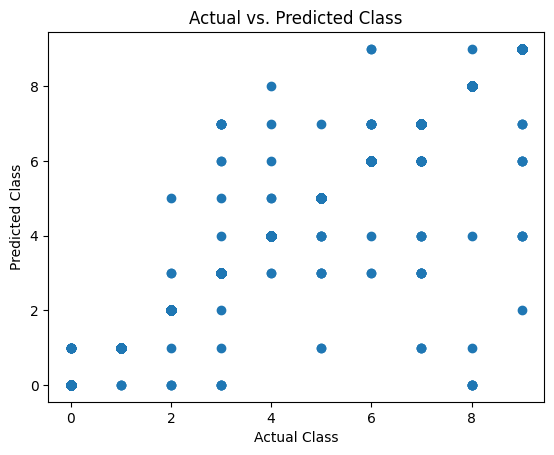

In [11]:
plt.scatter(y_val, y_train_pred)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.title("Actual vs. Predicted Class")
plt.show()

In [12]:
# Loading Test data
test = pd.read_csv("Classification_test.csv")

# Extracting features and target variable
test=test.values
features_test = test[:, 1:]
y_test = test[:, 0].reshape(-1,1)

# Normalisation
X_test = min_max_normalization(features_test)

In [14]:
y_pred = Knn(X_train, y_train, X_test, K=K)
y_pred

array([[0],
       [4],
       [5],
       ...,
       [0],
       [8],
       [4]], dtype=int64)

In [17]:
column_names = ['target'] + [f'features_{i}' for i in range(1,785)]
Result = pd.DataFrame(data=np.column_stack([y_pred, test[:, 1:]]), columns=column_names)
Result
# file_path = "KNN_output.csv"
# Result.to_csv(file_path, index=False)

,target,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_775,features_776,features_777,features_778,features_779,features_780,features_781,features_782,features_783,features_784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
